In [26]:
# Import the packages
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [27]:
# Capture the path of files in a variable
filepath = r"C:\Users\Arpita\Desktop\AnalytixLabs_new\Case Studies\Python Case Studies\Case Study 2 Credit Card"
filepath.replace("\\","/")

'C:/Users/Arpita/Desktop/AnalytixLabs_new/Case Studies/Python Case Studies/Case Study 2 Credit Card'

In [28]:
# Read the files
Cust = pd.read_csv(filepath + "/Customer Acqusition.csv")
spend = pd.read_csv(filepath + "/spend.csv")
repayment = pd.read_csv(filepath + "/Repayment.csv")

In [29]:
# Inspect them
Cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        100 non-null    int64  
 1   Customer  100 non-null    object 
 2   Age       100 non-null    int64  
 3   City      100 non-null    object 
 4   Product   100 non-null    object 
 5   Limit     100 non-null    float64
 6   Company   100 non-null    object 
 7   Segment   100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [30]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl No:    1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Type      1500 non-null   object 
 4   Amount    1500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


In [31]:
repayment.tail(10)

,SL No:,Customer,Month,Amount,Unnamed: 4
1513,NaN,NaN,NaN,NaN,NaN
1514,NaN,NaN,NaN,NaN,NaN
1515,NaN,NaN,NaN,NaN,NaN
1516,NaN,NaN,NaN,NaN,NaN
1517,NaN,NaN,NaN,NaN,NaN
1518,NaN,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaN,NaN,NaN
1522,NaN,NaN,NaN,NaN,NaN


In [32]:
# Remove NAs from the file
repayment = repayment.dropna(how = "all").dropna(axis = 1, how = "all")

In [33]:
# Join the datasets
cust_spend = pd.merge(left = Cust, right = spend, left_on = "Customer", right_on = "Customer", how = "inner")

In [34]:
cust_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07


In [35]:
# Form the final dataset for working on it
final_data = pd.merge(left = cust_spend, right = repayment, left_on = "Customer", right_on = "Customer", how = "inner", suffixes = ("_spend", "_repay"))

In [36]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37284 entries, 0 to 37283
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   No            37284 non-null  int64  
 1   Customer      37284 non-null  object 
 2   Age           37284 non-null  int64  
 3   City          37284 non-null  object 
 4   Product       37284 non-null  object 
 5   Limit         37284 non-null  float64
 6   Company       37284 non-null  object 
 7   Segment       37284 non-null  object 
 8   Sl No:        37284 non-null  int64  
 9   Month_spend   37284 non-null  object 
 10  Type          37284 non-null  object 
 11  Amount_spend  37284 non-null  float64
 12  SL No:        37266 non-null  float64
 13  Month_repay   37284 non-null  object 
 14  Amount_repay  37284 non-null  float64
dtypes: float64(4), int64(3), object(8)
memory usage: 4.6+ MB


In [37]:
final_data.Product.unique()

array(['Gold', 'Silver', 'Platimum'], dtype=object)

In [38]:
final_data.loc[final_data.Product == "Platimum", "Product"] = "Platinum"

In [39]:
# Replacing age < 18 with mean age
final_data.loc[final_data.Age < 18, 'Age'] = final_data.Age.mean()

In [40]:
# Replace amount_spend with 50% of the limit
final_data.loc[final_data['Amount_spend'] > final_data.Limit, ['Amount_spend']] = 0.5 * final_data['Limit']

In [41]:
# Replace amount_repay with the limit
final_data.loc[final_data['Amount_repay'] > final_data['Limit'], ['Amount_repay']] = final_data['Limit']

In [42]:
# No. of distinct customers 
final_data.Customer.nunique()

100

In [43]:
# No. of distinct categories (corrected)
final_data.Segment.nunique()

5

In [44]:
# Calculate average monthly spend (corrected)
final_data['Mon'] = pd.to_datetime(final_data.Month_spend, format = "%d-%b-%y").dt.strftime("%B")

In [45]:
final_data.groupby('Mon').Amount_spend.mean().astype(int)

Mon
April        138957
August       171892
December     114736
February     159385
January      155942
July         172496
June         185539
March        138588
May          161558
November     155925
October      142427
September    154158
Name: Amount_spend, dtype: int32

In [46]:
# Calculate average monthly repayment (corrected)
final_data.groupby('Mon').Amount_repay.mean().astype(int)

Mon
April        158260
August       186271
December     167746
February     182892
January      163665
July         171493
June         182569
March        158168
May          176682
November     173131
October      178959
September    179590
Name: Amount_repay, dtype: int32

In [47]:
# Profit for the bank for each month 
# RoI = 2.9%
final_data['Monthly_profit'] = final_data.Amount_repay - final_data.Amount_spend

In [48]:
# Replacing negative profit with 0
final_data.loc[final_data.Monthly_profit < 0, 'Monthly_profit'] = 0

In [49]:
grp = pd.to_datetime(final_data.Month_spend, format = "%d-%b-%y").dt.strftime("%b, %Y")

In [50]:
(final_data.groupby(grp).Monthly_profit.sum() * 0.029).astype(int).reset_index()

,Month_spend,Monthly_profit
0,"Apr, 2004",1178471
1,"Apr, 2005",1272053
2,"Apr, 2006",4037273
3,"Aug, 2005",1092337
4,"Aug, 2006",955935
5,"Dec, 2005",952489
6,"Dec, 2006",588452
7,"Feb, 2004",1299987
8,"Feb, 2005",9388415
9,"Feb, 2006",1470324


In [51]:
# Top 5 product types
final_data.groupby('Type').Amount_spend.sum().astype(int).sort_values(ascending = False)[0:5]

Type
CAMERA          751701147
PETRO           707154852
FOOD            547883478
AIR TICKET      540117988
TRAIN TICKET    534423947
Name: Amount_spend, dtype: int32

In [52]:
# City with maximum spend
final_data.groupby('City').Amount_spend.sum().astype(int).sort_values(ascending = False).reset_index().loc[0]

City                COCHIN
Amount_spend    1175903212
Name: 0, dtype: object

In [53]:
# creating the age groups
grp1 = pd.cut( final_data.Age, [19, 27, 40, 60, 80] )

In [54]:
# Age group having maximum spend
final_data.groupby(grp1).Amount_spend.sum().astype(int).sort_values().reset_index().loc[3]

Age               (27, 40]
Amount_spend    1783420170
Name: 3, dtype: object

In [55]:
# Top 10 customers in terms of repayment
final_data.groupby("Customer").Amount_repay.sum().astype(int).sort_values(ascending = False).iloc[0:10]

Customer
A61    400487430
A60    375299048
A13    296732020
A43    263186015
A45    261898380
A12    258377564
A14    246241327
A44    240086633
A39    236296982
A42    236079286
Name: Amount_repay, dtype: int32

In [56]:
# City wise spend on each product on yearly basis
final_data['Year'] = pd.to_datetime(final_data.Month_spend, format = "%d-%b-%y").dt.strftime("%Y")

In [57]:
summ = final_data.pivot_table( index=['Year','City'], columns='Product', values='Amount_spend', aggfunc='mean').astype(int)

In [58]:
# Tabular form
summ

Product            Gold  Platinum  Silver
Year City                                
2004 BANGALORE   253068     42279   54295
     BOMBAY      297981     42931   48371
     CALCUTTA    230600    110015   50000
     CHENNAI     172380    183141   56803
     COCHIN      214786     99800   51143
     DELHI       209319     47252   48545
     PATNA       301893    371023   47247
     TRIVANDRUM  241510    153705   48966
2005 BANGALORE   221100     32127   47170
     BOMBAY      234503     40932   45911
     CALCUTTA    263316    142031   57363
     CHENNAI     311745    148076   47148
     COCHIN      265527    127220   51124
     DELHI       151661     54906   55010
     PATNA       280113    360403   47927
     TRIVANDRUM  177196    120048   44985
2006 BANGALORE   243441     29877   53274
     BOMBAY      204979     39433   52569
     CALCUTTA    267959    100842   53066
     CHENNAI     235639    162988   50001
     COCHIN      225798     99679   52381
     DELHI       244242     58929   49708
     PATNA       206925    179448   50000
     TRIVANDRUM  273571    119300   50640

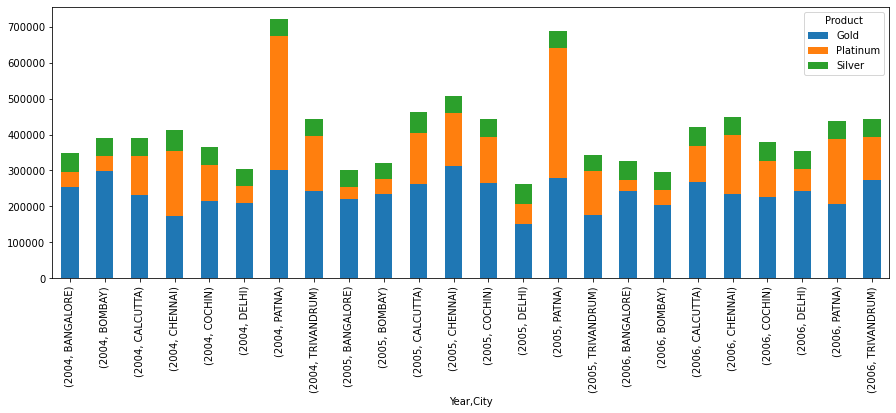

In [59]:
# Graphical representation of the same
summ.plot( kind = 'bar', legend = True, stacked = True, figsize = (15, 5))
plt.show()

In [70]:
# Sort the month values in chronological order for better representation
sort_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

In [71]:
final_data['Mon'] = pd.CategoricalIndex(final_data['Mon'], categories = sort_order, ordered = True)

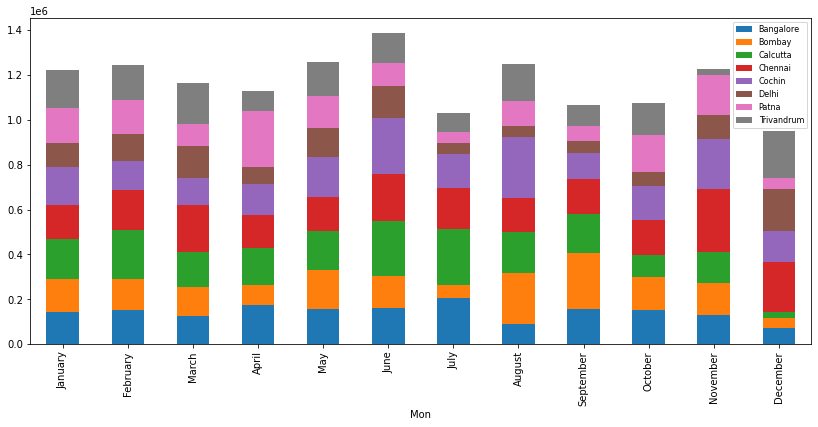

In [63]:
# Monthly comparision of total spend city wise
pd.crosstab(final_data.Mon, final_data.City, values = final_data.Amount_spend, aggfunc="mean").plot(kind = "bar", figsize = (14,6), stacked = True)
plt.legend(['Bangalore','Bombay','Calcutta','Chennai','Cochin','Delhi','Patna','Trivandrum'], fontsize="8", loc ="upper right")
plt.show()

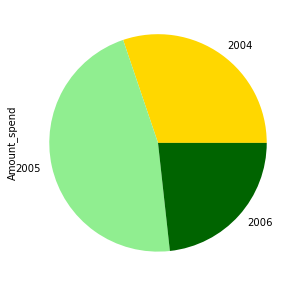

In [64]:
# Comparision of yearly spend on air tickets
final_data[final_data.Type == "AIR TICKET"].groupby('Year').Amount_spend.mean().plot(kind= "pie", figsize = (5,5), colors = ['Gold','LightGreen','DarkGreen'])
plt.show()

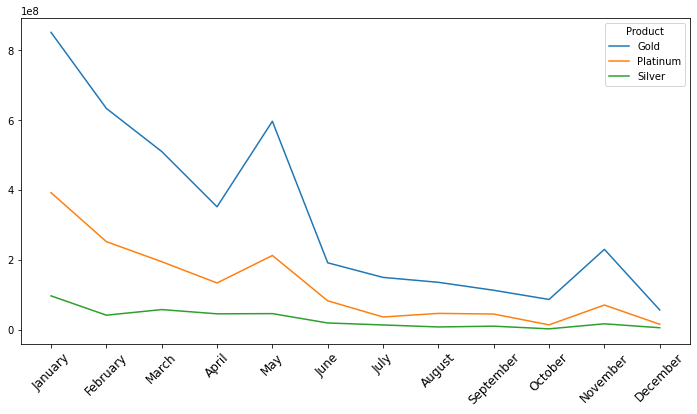

In [65]:
# Comparision of monthly spend on each product
df = final_data.pivot_table(index = 'Mon', columns = 'Product', values = 'Amount_spend', aggfunc="sum").reset_index()
df.plot(figsize = (12,6))
plt.xticks( range(0,len(df.Mon)), df.Mon,fontsize=12, rotation = 45)
plt.show()

In [66]:
# Forming month and year variables for repayment
final_data['year'] = pd.to_datetime(final_data.Month_repay, format = "%d-%b-%y").dt.strftime("%Y")

In [67]:
final_data['month'] = pd.to_datetime(final_data.Month_repay, format = "%d-%b-%y").dt.strftime("%b")

In [68]:
# UDF for top 10 customers in each city in terms of repayment by different products and different time periods
def top_cust(prod, time_period):
    if time_period not in (['year','month']) or prod not in (['Silver','Gold','Platinum']):
        print('Please select a valid product type and time period as year or month!')
    else:
        for city in final_data['City'].unique():
            x = final_data[(final_data.Product == prod) & (final_data.City== city)].groupby([time_period, 'City','Customer'])\
            .Amount_repay.mean().reset_index().sort_values(['Amount_repay'], ascending = False).head(10).reset_index()\
            [[time_period, 'City','Customer','Amount_repay']]
            print(x)  

In [69]:
top_cust( 'Silver','year')

   year       City Customer   Amount_repay
0  2005  BANGALORE      A76  265619.050000
1  2006  BANGALORE      A59  100003.000000
2  2005  BANGALORE      A23  100001.000000
3  2004  BANGALORE      A72  100000.000000
4  2006  BANGALORE      A18  100000.000000
5  2006  BANGALORE      A23   96991.702222
6  2004  BANGALORE      A59   96651.071429
7  2005  BANGALORE      A18   91185.201429
8  2004  BANGALORE      A23   83120.713750
9  2004  BANGALORE      A18   81932.118333
   year      City Customer   Amount_repay
0  2006  CALCUTTA      A87  100003.000000
1  2005  CALCUTTA      A73  100001.000000
2  2004  CALCUTTA       A2  100000.000000
3  2006  CALCUTTA       A2  100000.000000
4  2005  CALCUTTA      A58   90028.975000
5  2005  CALCUTTA       A2   82054.800000
6  2004  CALCUTTA      A58   76259.374286
7  2006  CALCUTTA      A58   68606.695000
8  2006  CALCUTTA      A78   55344.810000
   year    City Customer   Amount_repay
0  2006  COCHIN      A79  193230.310000
1  2006  COCHIN      A25  1